In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,WordPunctTokenizer
from string import punctuation
from bs4 import BeautifulSoup
import re
import string
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
df  = pd.read_csv('../archive/UpdatedResumeDataSet.csv')

df.head(5)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [5]:
label_encoder = {}
i = 0
for x in df['Category'].unique():
    label_encoder[x] = i
    i+=1
label_encoder


{'Data Science': 0,
 'HR': 1,
 'Advocate': 2,
 'Arts': 3,
 'Web Designing': 4,
 'Mechanical Engineer': 5,
 'Sales': 6,
 'Health and fitness': 7,
 'Civil Engineer': 8,
 'Java Developer': 9,
 'Business Analyst': 10,
 'SAP Developer': 11,
 'Automation Testing': 12,
 'Electrical Engineering': 13,
 'Operations Manager': 14,
 'Python Developer': 15,
 'DevOps Engineer': 16,
 'Network Security Engineer': 17,
 'PMO': 18,
 'Database': 19,
 'Hadoop': 20,
 'ETL Developer': 21,
 'DotNet Developer': 22,
 'Blockchain': 23,
 'Testing': 24}

In [6]:
# clfimport nltk
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize,WordPunctTokenizer
# from string import punctuation
# from bs4 import BeautifulSoup
# import re
# import string


nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    
    text = url_pattern.sub('',text)
    soup = BeautifulSoup(text, 'html.parser')
    text = soup.get_text(separator=' ')

    text = text.lower()

    # Lowercase the text
    contractions = {
        r"\b(can't)\b": "can not",
        r"\b(ain't)\b": "am not",
        r"\b(aren't)\b": "are not",
        r"\b(couldn't)\b": "could not",
        r"\b(didn't)\b": "did not",
        r"\b(doesn't)\b": "does not",
        r"\b(don't)\b": "do not",
        r"\b(hadn't)\b": "had not",
        r"\b(hasn't)\b": "has not",
        r"\b(haven't)\b": "have not",
        r"\b(isn't)\b": "is not",
        r"\b(there's)\b": "there is",
        r"\b(wasn't)\b": "was not",
        r"\b(why's)\b": "why is",
        r"\b(won't)\b": "will not",
        r"\b(wouldn't)\b": "would not",
    }

    # Replace contractions with their expanded forms
    for pattern, replacement in contractions.items():
        text = re.sub(pattern, replacement, text)

    text = text.replace("'s",' is')
    text = text.replace("'m",' am')
    text = text.replace("'re",' are')
    text = text.replace("'ve",' have')
    text = text.replace("'ll",' will')
    text = text.replace("'d",' would')
    text = text.replace("n't",' not')
    text = text.replace("'t",' not')
    # Tokenization
    tokens = word_tokenize(text)
    

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    # stop_words.append("can't")
    tokens = [token for token in tokens if token not in stop_words]

    # Remove punctuations
    tokens = [token for token in tokens if token.isalpha() or token.isalnum()]

    # Remove blank space tokens
    tokens = [token for token in tokens if token.strip() != ' ']

    processed_text = ' '.join(tokens)
    return processed_text

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/priyash7/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/priyash7/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
df['Resume'] = df['Resume'].apply(lambda x:preprocess_text(x))

In [8]:
df['Category'] = df['Category'].apply(lambda x:label_encoder[x])

In [9]:
# from sklearn.preprocessing import LabelEncoder

# First label encoding the categories
encoder = LabelEncoder()
# clf
encoder.fit(df['Category'])

df['Category'] = encoder.transform(df['Category'])

In [10]:
# from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf.fit(df["Resume"])
resume = tfidf.transform(df["Resume"])

In [11]:
# from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(resume, df["Category"], test_size=0.2, random_state=42)


Accuracy of the KNN classifier on test set: 0.98
Precision: 0.98
Recall: 0.98
F1-score: 0.98


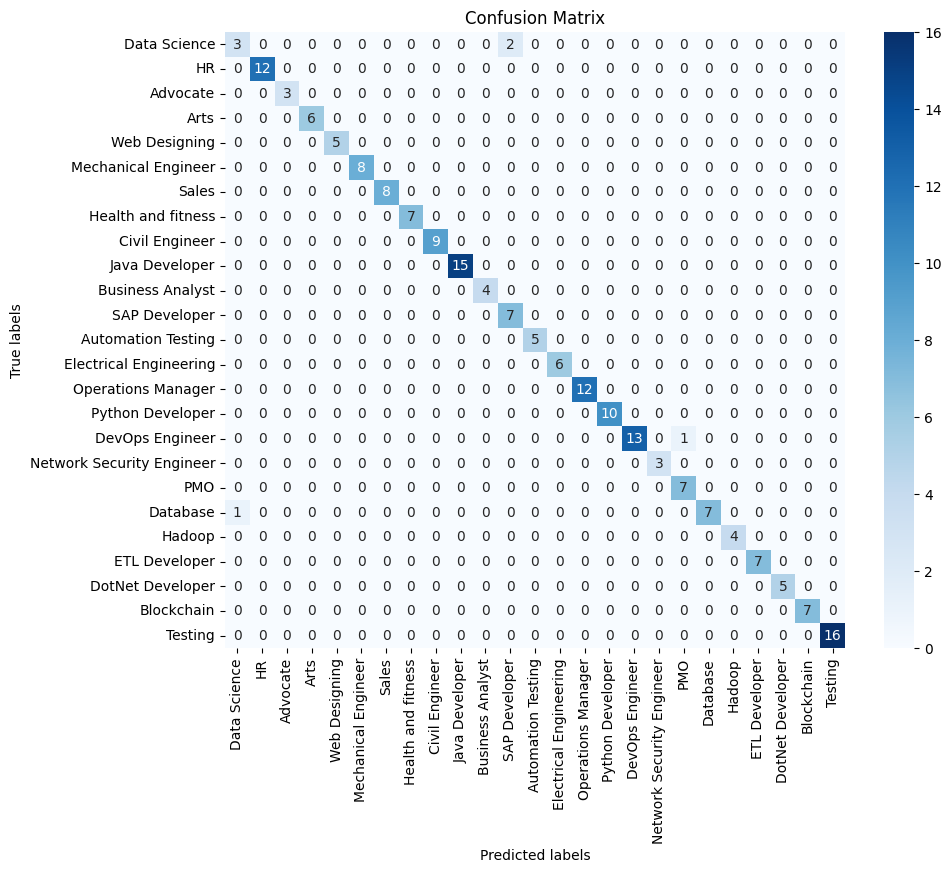

In [14]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# Initialize the KNN classifier with default parameters
clf = KNeighborsClassifier()

# Train the classifier using the training data
clf.fit(X_train, y_train)

# Predict the categories for the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the metrics
print(f'Accuracy of the KNN classifier on test set: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1_score:.2f}')


# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.keys(), yticklabels=label_encoder.keys())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy of the Random Forest classifier on test set: 0.98
Precision: 0.99
Recall: 0.98
F1-score: 0.98


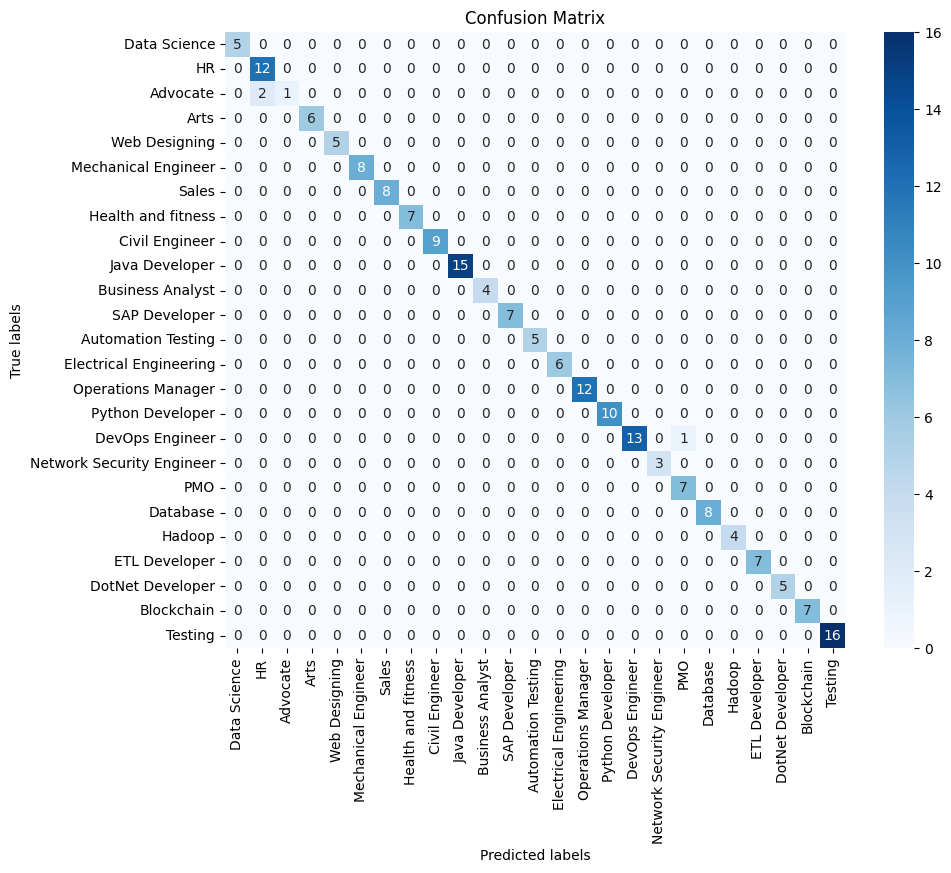

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier with default parameters
clf = RandomForestClassifier(random_state=42)

# Train the classifier using the training data
clf.fit(X_train, y_train)
# Predict the categories for the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the metrics
print(f'Accuracy of the Random Forest classifier on test set: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1_score:.2f}')
# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.keys(), yticklabels=label_encoder.keys())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [18]:
# import pickle

with open('model.pkl','wb') as f:
    pickle.dump(clf,f)

In [19]:
with open('tfidf.pkl','wb') as f:
    pickle.dump(tfidf,f)